In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
df_od = pd.read_csv("/Users/adityabasude/Desktop/NullCL/order_detail.csv")
df_sd = pd.read_csv("/Users/adityabasude/Desktop/NullCL/sku_detail.csv")
df_pd = pd.read_csv("/Users/adityabasude/Desktop/NullCL/payment_detail.csv")
df_cd = pd.read_csv("/Users/adityabasude/Desktop/NullCL/customer_detail.csv")


In [27]:
# Merge the dataframes
# Before merge we need to rename column in order to avoid duplicate column value
# So the key column will be excluded when joined
df_sd.rename(columns={'id':'sku_id'}, inplace=True)
df_cd.rename(columns={'id':'customer_id'}, inplace=True)
df_pd.rename(columns={'id':'payment_id'}, inplace=True)

In [29]:
# Merge the dataframes using left join
df = pd.DataFrame(df_od\
                  # Merge order_detail with sku_detail on column sku_id
                  .merge(df_sd, how='left', on='sku_id')\
                  # Merge the result to customer_detail on column customer_id
                  .merge(df_cd, how='left', on='customer_id')\
                  # Merge the result to payment_detail on column payment_id
                  .merge(df_pd, how='left', on='payment_id')
                  )

In [31]:
# check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5764 non-null   object 
 1   customer_id      5764 non-null   object 
 2   order_date       5764 non-null   object 
 3   sku_id           5764 non-null   object 
 4   price            5764 non-null   int64  
 5   qty_ordered      5764 non-null   int64  
 6   before_discount  5764 non-null   float64
 7   discount_amount  5764 non-null   float64
 8   after_discount   5764 non-null   float64
 9   is_gross         5764 non-null   int64  
 10  is_valid         5764 non-null   int64  
 11  is_net           5764 non-null   int64  
 12  payment_id       5764 non-null   int64  
 13  sku_name         5764 non-null   object 
 14  base_price       5764 non-null   float64
 15  cogs             5764 non-null   float64
 16  category         5764 non-null   object 
 17  registered_dat

In [33]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['registered_date'] = pd.to_datetime(df['registered_date'])


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5764 non-null   object        
 1   customer_id      5764 non-null   object        
 2   order_date       5764 non-null   datetime64[ns]
 3   sku_id           5764 non-null   object        
 4   price            5764 non-null   int64         
 5   qty_ordered      5764 non-null   int64         
 6   before_discount  5764 non-null   float64       
 7   discount_amount  5764 non-null   float64       
 8   after_discount   5764 non-null   float64       
 9   is_gross         5764 non-null   int64         
 10  is_valid         5764 non-null   int64         
 11  is_net           5764 non-null   int64         
 12  payment_id       5764 non-null   int64         
 13  sku_name         5764 non-null   object        
 14  base_price       5764 non-null   float64

## Tasks Completed Below

# Task 2

Average Order Value (AOV) Over Time (Monthly Trend) Scenario: The Sales Team wants to track how the Average Order Value (AOV) has changed month over month in 2022. Requirements: • Create a line chart that shows the AOV trend over time. • Use the formula SUM(after_discount) / COUNT_DISTINCT(id) to calculate AOV. • Filter the data for the year 2022 and group by month. • Display the AOV trend for each month. Key Features to Use: • order_date (for time-based grouping) • after_discount • id


In [37]:
# Filter only year 2022 orders
df_2022 = df[df['order_date'].dt.year == 2022].copy()

# Extract month number
df_2022['month'] = df_2022['order_date'].dt.month

df_2022.head()


,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,sku_name,base_price,cogs,category,registered_date,payment_method,month
0,ODR1111336599a,C993531L,2022-02-23,P569750,62002,1,62002.0,0.0,62002.0,1,0,0,5,emart_Magic Hose Pipe 75 Ft,61654.0,51156.0,Home & Living,2021-11-08,jazzwallet,2
1,ODR1116457650x,C517907L,2022-10-08,P320550,159500,1,159500.0,0.0,159500.0,1,1,1,1,sheraton_FMOTORS_01,159500.0,97266.0,Health & Sports,2022-08-15,cod,10
7,ODR1126180881t,C875194L,2022-01-14,P507387,57420,2,114840.0,0.0,114840.0,1,1,0,1,nutrifactor_NF002,57420.0,51098.0,Health & Sports,2021-07-21,cod,1
8,ODR1129414841e,C652751L,2022-07-26,P392301,4756000,1,4756000.0,0.0,4756000.0,1,0,0,1,Ifitness_T300,4756000.0,3757240.0,Health & Sports,2022-07-19,cod,7
10,ODR1131384330p,C597119L,2022-04-16,P920137,28942,3,86826.0,0.0,86826.0,1,1,1,1,emart_0-64,14500.0,11716.0,Home & Living,2022-01-02,cod,4


In [39]:
# Group by month and calculate AOV
aov_monthly = df_2022.groupby('month').agg(
    total_revenue=('after_discount','sum'),
    total_orders=('id','nunique')   # distinct order IDs
).reset_index()

# Compute AOV
aov_monthly['AOV'] = aov_monthly['total_revenue'] / aov_monthly['total_orders']

aov_monthly


,month,total_revenue,total_orders,AOV
0,1,4.343808e+08,385,1.128262e+06
1,2,3.606627e+08,335,1.076605e+06
2,3,4.988410e+08,390,1.279079e+06
3,4,6.775910e+08,366,1.851341e+06
4,5,5.295843e+08,392,1.350980e+06
5,6,3.896890e+08,362,1.076489e+06
6,7,4.416019e+08,388,1.138149e+06
7,8,6.861111e+08,128,5.360243e+06
8,9,6.582557e+08,112,5.877283e+06
9,10,1.240201e+08,114,1.087895e+06


In [41]:
pd.set_option('display.float_format', '{:,.2f}'.format)


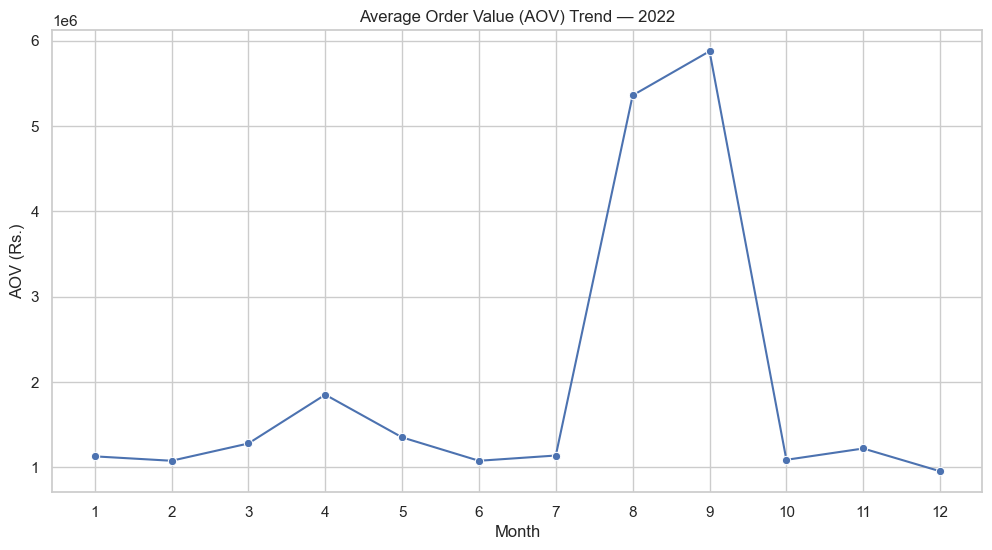

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=aov_monthly, x='month', y='AOV', marker='o')

plt.title("Average Order Value (AOV) Trend — 2022")
plt.xlabel("Month")
plt.ylabel("AOV (Rs.)")
plt.xticks(range(1,13))

plt.show()


# Task 3

Comparing Weekend and Weekday Sales in Q4 2022 Scenario: The Campaign Team wants to evaluate the effectiveness of their weekend promotional campaigns (Saturdays and Sundays) between October and December 2022 by comparing the average daily sales during weekends vs weekdays. Requirements: 1. Calculate the average daily sales (before_discount) for weekends (Saturdays and Sundays) and weekdays (Monday to Friday) for each month (October, November, and December 2022). 2. Calculate the average sales for weekends vs weekdays for the entire three-month period. 3. Share insights on whether sales increased during weekends. Key Features to Use: • order_date (for filtering by date and identifying days of the week) • before_discount (for sales data) • month_id, month_name, day_name, year (for extracting date-related information)

In [51]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['registered_date'] = pd.to_datetime(df['registered_date'], errors='coerce')

df['year'] = df['order_date'].dt.year
df['month_id'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_name'] = df['order_date'].dt.day_name()


In [55]:
import numpy as np


In [75]:
# Filter Q4 2022
q4 = df[(df['year']==2022) & (df['month_id'].isin([10,11,12]))].copy()
q4['type'] = np.where(q4['day_name'].isin(['Saturday','Sunday']), 'Weekend', 'Weekday')

q4[['order_date','before_discount','day_name','type']].head(6)


,order_date,before_discount,day_name,type
1,2022-10-08,"159,500.00",Saturday,Weekend
19,2022-10-07,"5,680,400.00",Friday,Weekday
74,2022-10-04,"7,540,000.00",Tuesday,Weekday
124,2022-10-07,"38,512.00",Friday,Weekday
165,2022-12-06,"382,800.00",Tuesday,Weekday
199,2022-12-01,"74,530.00",Thursday,Weekday


In [77]:
daily = q4.groupby(['month_id','month_name','type','order_date'], as_index=False)['before_discount'].sum().rename(columns={'before_discount':'daily_total_before_discount'})
daily.sort_values(['order_date']).head(6)


,month_id,month_name,type,order_date,daily_total_before_discount
5,10,October,Weekend,2022-10-01,"16,387,842.00"
6,10,October,Weekend,2022-10-02,"10,764,628.00"
0,10,October,Weekday,2022-10-03,"11,676,040.00"
1,10,October,Weekday,2022-10-04,"20,873,792.00"
2,10,October,Weekday,2022-10-05,"15,150,522.00"
3,10,October,Weekday,2022-10-06,"18,092,230.00"


In [89]:
# Daily totals
daily = q4.groupby(['month_id','month_name','type','order_date'], as_index=False)['before_discount']\
          .sum()\
          .rename(columns={'before_discount':'daily_total_before_discount'})

# Monthly averages
monthly_avg = daily.groupby(['month_id','month_name','type'], as_index=False)['daily_total_before_discount']\
                   .mean()\
                   .rename(columns={'daily_total_before_discount':'avg_daily_sales'})

# Pivot for plotting
pivot = monthly_avg.pivot(index=['month_id','month_name'], 
                          columns='type', 
                          values='avg_daily_sales')\
                   .reset_index()


In [91]:
pivot

type,month_id,month_name,Weekday,Weekend
0,10,October,"16,094,023.60","14,624,370.67"
1,11,November,"18,889,721.67","15,170,130.00"
2,12,December,"13,485,287.33","14,624,409.00"


In [81]:
overall = daily.groupby('type', as_index=False)['daily_total_before_discount'].mean().rename(columns={'daily_total_before_discount':'overall_avg_daily_sales'})
overall_display = overall.copy()
overall_display['overall_avg_daily_sales'] = overall_display['overall_avg_daily_sales'].map(lambda x: f"{x:,.2f}")
overall_display


,type,overall_avg_daily_sales
0,Weekday,"16,160,010.12"
1,Weekend,"14,780,312.86"


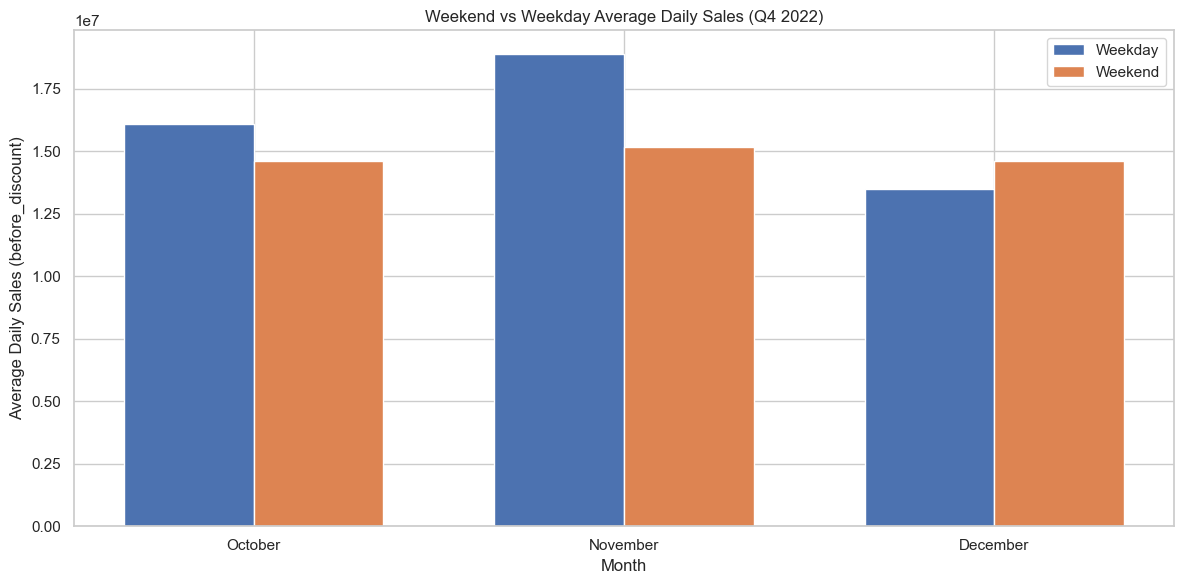

In [93]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

x = np.arange(len(pivot['month_name']))
width = 0.35

plt.bar(x - width/2, pivot['Weekday'], width, label='Weekday')
plt.bar(x + width/2, pivot['Weekend'], width, label='Weekend')

plt.xticks(x, pivot['month_name'])
plt.xlabel("Month")
plt.ylabel("Average Daily Sales (before_discount)")
plt.title("Weekend vs Weekday Average Daily Sales (Q4 2022)")
plt.legend()

plt.tight_layout()
plt.show()


# Task 4

Analyzing Sales Decrease in the "Others" Category Between 2021 and 2022 Scenario: The Warehouse Team has observed a surplus in the stock of "Others" category products at the end of 2022. They would like to know if sales have declined in 2022 compared to 2021. Additionally, they want to see the 20 products that experienced the largest decrease in sales. Requirements: 1. Create two datasets: o One for sales data in 2021 (qty_ordered for "Others" category). o One for sales data in 2022 (qty_ordered for "Others" category). 2. Merge the datasets and calculate the sales difference between 2022 and 2021. 3. Calculate the percentage change in sales and classify it as "DOWN", "UP", or "FAIR". 4. Sort the products by the largest decrease in sales and show the top 20 products. 5. Create a horizontal bar chart to display the products with the largest decrease in sales between 2022 and 2021. Key Features to Use: • category • order_date (for filtering by year) • is_valid • sku_name • qty_ordered

In [99]:
others_2021 = (
    df[(df['category']=='Others') &
       (df['is_valid']==1) &
       (df['year']==2021)]
    .groupby(['sku_name'])['qty_ordered']
    .sum()
    .reset_index(name='qty_ordered_2021')
)
others_2021.head()


,sku_name,qty_ordered_2021
0,Aladdin_Wrench_Snap N Grip_01,1
1,Aladdin_bike_cover,3
2,Am-PTV_ATS-004-M,5
3,BFV_Black Friday voucher Rs 1500,1
4,BFV_Black Friday voucher Rs 2000,1


In [101]:
others_2022 = (
    df[(df['category']=='Others') &
       (df['is_valid']==1) &
       (df['year']==2022)]
    .groupby(['sku_name'])['qty_ordered']
    .sum()
    .reset_index(name='qty_ordered_2022')
)
others_2022.head()


,sku_name,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,1
1,Aladdin_bike_cover,2
2,Alerashine_sku-09-XL,1
3,Audionic_6-954217-510248,1
4,BO_Pack of 6 - Non-Stick Cooking Utensils - Black,1


In [103]:
others = others_2021.merge(others_2022, on='sku_name', how='outer')
others['qty_ordered_2021'] = others['qty_ordered_2021'].fillna(0)
others['qty_ordered_2022'] = others['qty_ordered_2022'].fillna(0)

others.head()


,sku_name,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,0.00,1.00
1,Aladdin_Wrench_Snap N Grip_01,1.00,0.00
2,Aladdin_bike_cover,3.00,2.00
3,Alerashine_sku-09-XL,0.00,1.00
4,Am-PTV_ATS-004-M,5.00,0.00


In [105]:
# Difference
others['delta_2022_2021'] = others['qty_ordered_2022'] - others['qty_ordered_2021']

# Percentage change
others['pct_change'] = np.where(
    others['qty_ordered_2021'] == 0,
    0,  # avoid division by zero
    round((others['delta_2022_2021'] / others['qty_ordered_2021']) * 100, 2)
)

# Remark
def remark(x):
    if x < 0: return "DOWN"
    elif x > 0: return "UP"
    else: return "FAIR"

others['remark'] = others['delta_2022_2021'].apply(remark)

others.head()


,sku_name,qty_ordered_2021,qty_ordered_2022,delta_2022_2021,pct_change,remark
0,AL Khair_Baby Oil 50ml,0.00,1.00,1.00,0.00,UP
1,Aladdin_Wrench_Snap N Grip_01,1.00,0.00,-1.00,-100.00,DOWN
2,Aladdin_bike_cover,3.00,2.00,-1.00,-33.33,DOWN
3,Alerashine_sku-09-XL,0.00,1.00,1.00,0.00,UP
4,Am-PTV_ATS-004-M,5.00,0.00,-5.00,-100.00,DOWN


In [107]:
others_sorted = others.sort_values(by='delta_2022_2021', ascending=True).reset_index(drop=True)
top20 = others_sorted.head(20)

top20


,sku_name,qty_ordered_2021,qty_ordered_2022,delta_2022_2021,pct_change,remark
0,RB_Dettol Germ Busting Kit-bf,200.00,40.00,-160.00,-80.00,DOWN
1,Dawlance_MD 10 + DWB 600,23.00,0.00,-23.00,-100.00,DOWN
2,Telemall_MM-DR-HB-L,23.00,2.00,-21.00,-91.30,DOWN
3,iu_Tickets General Enclosure-Islamabad,20.00,0.00,-20.00,-100.00,DOWN
4,RS_Rehmat-e-Shereen Mix Mithai,13.00,0.00,-13.00,-100.00,DOWN
5,kansai_NeverWet,10.00,1.00,-9.00,-90.00,DOWN
6,sindbad_Sindbad Gift Card-3,7.00,0.00,-7.00,-100.00,DOWN
7,emart_00-1,7.00,1.00,-6.00,-85.71,DOWN
8,Vouch 365 2016,5.00,0.00,-5.00,-100.00,DOWN
9,Am-PTV_ATS-004-M,5.00,0.00,-5.00,-100.00,DOWN


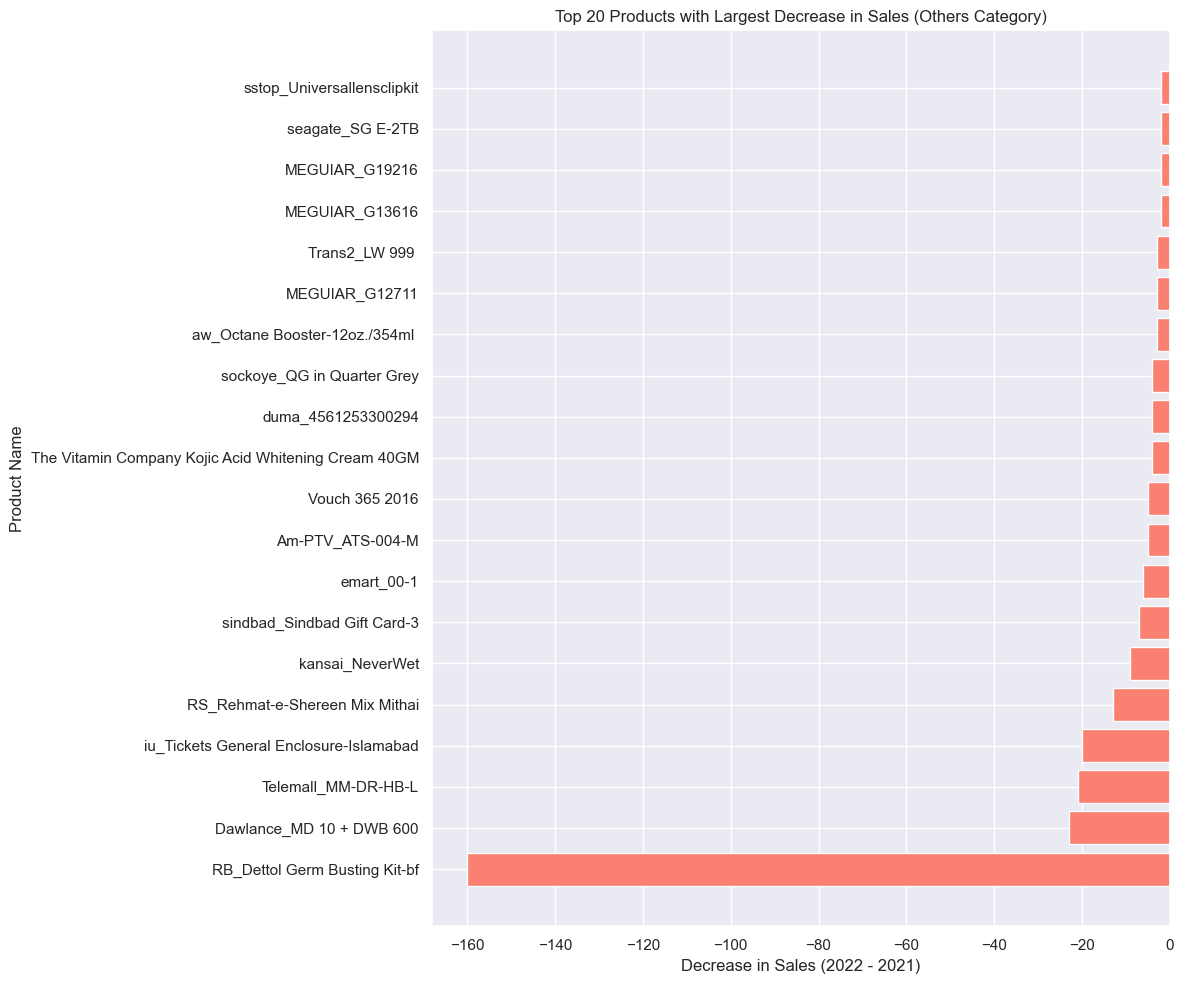

In [109]:
sns.set()
plt.figure(figsize=(12,10))

top20_sorted_plot = top20.sort_values(by='delta_2022_2021', ascending=True)

plt.barh(top20_sorted_plot['sku_name'], top20_sorted_plot['delta_2022_2021'], color='salmon')

plt.xlabel("Decrease in Sales (2022 - 2021)")
plt.ylabel("Product Name")
plt.title("Top 20 Products with Largest Decrease in Sales (Others Category)")
plt.grid(True, axis='x')

plt.tight_layout()
plt.show()


# Task 5

Comparing Sales Trends for Multiple Categories in 2022 Scenario: The Marketing Team wants to compare the sales trends for multiple categories in 2022 to identify which category performed best. Requirements: 1. Aggregate the sales data by category for 2022. 2. Plot a time series of sales trends for each category (use order_date to group by month or week). 3. Provide insights on which category had the highest sales growth. Key Features to Use: • category • order_date (for time series analysis) • qty_ordered

In [129]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month          
df['month_name'] = df['order_date'].dt.month_name()
df['day_name'] = df['order_date'].dt.day_name()


# Filter to 2022
df_2022 = df[df['year'] == 2022].copy()

# check
print("df_2022 shape:", df_2022.shape)
print("Sample rows:")
display(df_2022[['order_date','month','month_name','category','qty_ordered']].head())

df_2022 shape: (3202, 24)
Sample rows:


,order_date,month,month_name,category,qty_ordered
0,2022-02-23,2,February,Home & Living,1
1,2022-10-08,10,October,Health & Sports,1
7,2022-01-14,1,January,Health & Sports,2
8,2022-07-26,7,July,Health & Sports,1
10,2022-04-16,4,April,Home & Living,3


In [133]:
# Aggregate monthly quantity sold per category
monthly_sales = (
    df_2022.groupby(['month','month_name','category'], as_index=False)['qty_ordered']
           .sum()
           .sort_values(['month','category'])
)

# show first rows
display(monthly_sales.head(12))


,month,month_name,category,qty_ordered
0,1,January,Appliances,30
1,1,January,Beauty & Grooming,57
2,1,January,Books,35
3,1,January,Computing,27
4,1,January,Entertainment,27
5,1,January,Health & Sports,36
6,1,January,Home & Living,34
7,1,January,Kids & Baby,37
8,1,January,Men Fashion,66
9,1,January,Mobiles & Tablets,58


In [135]:
sales_pivot = monthly_sales.pivot(
    index='month',
    columns='category',
    values='qty_ordered'
).fillna(0)

sales_pivot


category,Appliances,Beauty & Grooming,Books,Computing,Entertainment,Health & Sports,Home & Living,Kids & Baby,Men Fashion,Mobiles & Tablets,Others,School & Education,Soghaat,Superstore,Women Fashion
month,,,,,,,,,,,,,,,
1,30,57,35,27,27,36,34,37,66,58,32,54,127,116,33
2,34,25,19,28,24,25,34,24,33,55,34,26,144,76,29
3,33,27,30,28,31,31,41,41,32,53,39,33,117,101,197
4,29,44,22,30,73,29,52,30,29,49,30,24,394,111,181
5,26,30,25,28,26,31,30,41,67,32,36,25,180,46,36
6,25,34,27,26,25,33,32,30,32,26,65,21,65,259,35
7,31,33,31,30,27,33,36,27,31,61,32,36,73,52,37
8,24,14,7,8,12,12,14,10,11,1019,13,10,46,18,10
9,9,11,6,7,7,11,11,12,6,1024,13,7,17,22,9


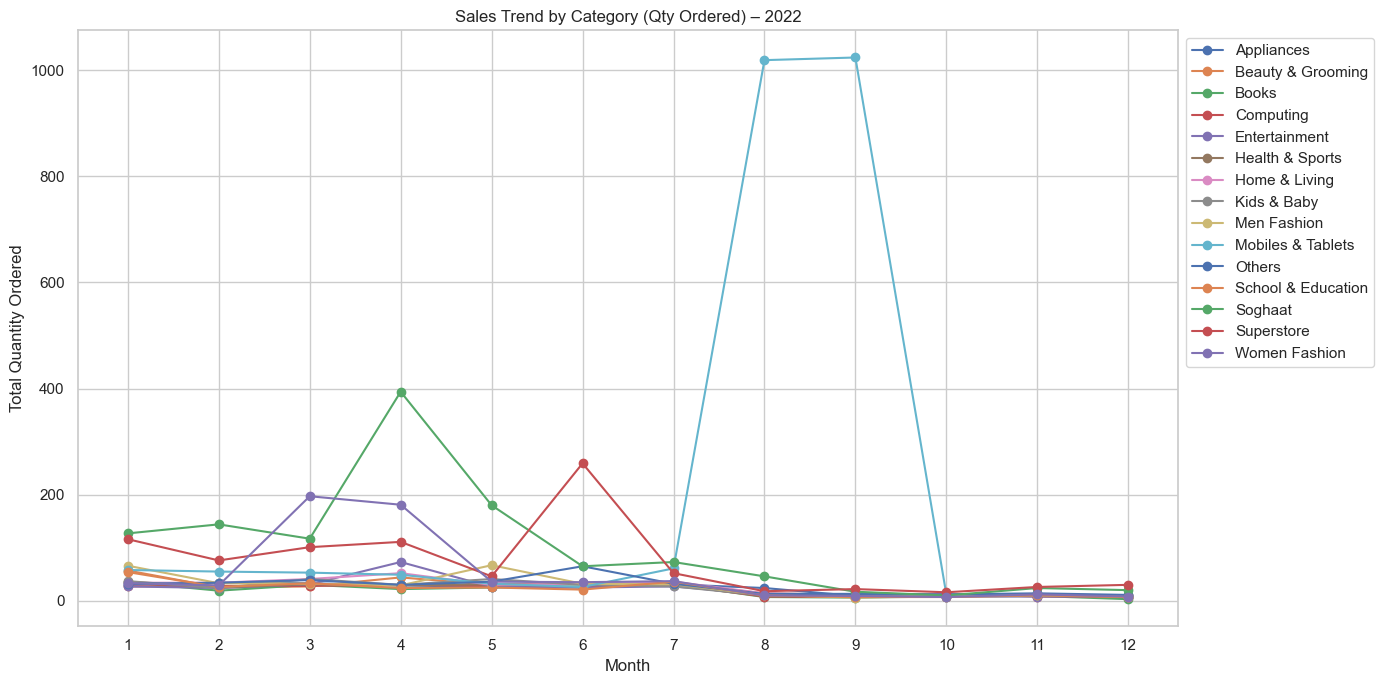

In [137]:
sns.set(style="whitegrid")

plt.figure(figsize=(14,7))

for category in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[category], marker='o', label=category)

plt.title("Sales Trend by Category (Qty Ordered) – 2022")
plt.xlabel("Month")
plt.ylabel("Total Quantity Ordered")
plt.xticks(range(1,13))
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [144]:
# Category with Highest growth

if 1 not in sales_pivot.index and 'January' in sales_pivot.index:
    # if pivot indexed by month_name, handle accordingly
    pivot_for_growth = sales_pivot.copy()
    jan = pivot_for_growth.loc['January']
    dec = pivot_for_growth.loc['December']
else:
    pivot_for_growth = sales_pivot.copy()
    jan = pivot_for_growth.loc[1]
    dec = pivot_for_growth.loc[12]

growth_df = pd.DataFrame({
    'category': pivot_for_growth.columns,
    'jan_qty': jan.values,
    'dec_qty': dec.values
})
growth_df['growth'] = growth_df['dec_qty'] - growth_df['jan_qty']
growth_df = growth_df.sort_values('growth', ascending=False).reset_index(drop=True)
display(growth_df.head(10))



,category,jan_qty,dec_qty,growth
0,Computing,27,8,-19
1,Entertainment,27,8,-19
2,Appliances,30,9,-21
3,Others,32,11,-21
4,Home & Living,34,10,-24
5,Women Fashion,33,8,-25
6,Kids & Baby,37,10,-27
7,Health & Sports,36,8,-28
8,Books,35,3,-32
9,School & Education,54,7,-47


# Task 6

Question 1: Top 5 Products by Sales in 2022 for the "Mobiles & Tablets" Category Scenario: The Marketing Team is preparing for a Year-End Festival and needs to identify the top 5 products in the "Mobiles & Tablets" category that had the highest sales quantities in 2022. The products should be filtered to ensure only valid orders are included. Requirements: • Filter the data to include only products from the "Mobiles & Tablets" category in 2022, where the is_valid feature is set to 1. • Group the data by sku_name and category, and sum the qty_ordered for each product. • Rank the products based on their total sales quantity in descending order. • Display the top 5 products with the highest sales quantities. • Generate a horizontal bar chart showing the top 5 products by quantity. Key Features to Use: • category • order_date (for filtering by year) • is_valid (to filter valid orders) • sku_name (for product names) • qty_ordered (for sales quantities)

In [148]:
# Filter to Mobiles & Tablets in 2022
mob_2022 = df[
    (df['category'] == 'Mobiles & Tablets') &
    (df['is_valid'] == 1) &
    (df['order_date'].dt.year == 2022)
]

mob_2022[['order_date','sku_name','qty_ordered']].head()


,order_date,sku_name,qty_ordered
62,2022-02-23,huawei_Mate 9-mocjha brown,1
260,2022-07-24,iPhone7Plus-Red-256GB,1
304,2022-07-23,cc_samsung_G935F-Blue,3
346,2022-02-25,iphone-7-32gb-wof-Matt Black,1
491,2022-01-24,Apple iPhone 6S Plus 16GB Silver,1


In [150]:
top5_mobiles = (
    mob_2022.groupby(['sku_name','category'])['qty_ordered']
            .sum()
            .reset_index(name='total_qty')
            .sort_values('total_qty', ascending=False)
            .head(5)
            .reset_index(drop=True)
)

top5_mobiles


,sku_name,category,total_qty
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31
2,Infinix Hot 4-Gold,Mobiles & Tablets,15
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11
4,infinix_Zero 4-Grey,Mobiles & Tablets,10


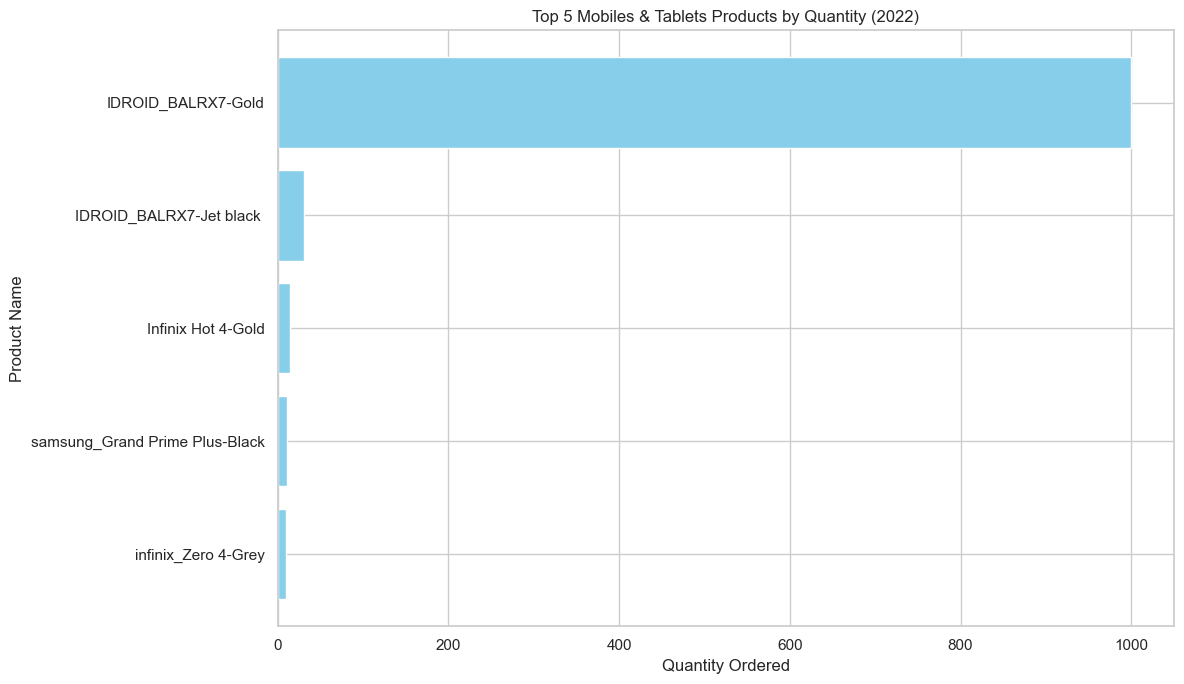

In [152]:
sns.set(style="whitegrid")

top5_mobiles_sorted = top5_mobiles.sort_values('total_qty', ascending=True)

plt.figure(figsize=(12,7))
plt.barh(top5_mobiles_sorted['sku_name'], top5_mobiles_sorted['total_qty'], color='skyblue')

plt.xlabel("Quantity Ordered")
plt.ylabel("Product Name")
plt.title("Top 5 Mobiles & Tablets Products by Quantity (2022)")
plt.grid(True, axis='x')

plt.tight_layout()
plt.show()


# Task 7

Finding Products with the Largest Decrease in Sales Between Two Periods (e.g., 2022 vs 2021) Scenario: The Sales Team would like to identify which products had the most significant decrease in sales between two periods (e.g., 2021 and 2022). Requirements: 1. Create two datasets for each period (e.g., 2021 and 2022), aggregated by product (sku_name). 2. Calculate the sales difference between the two periods. 3. Identify the products with the largest decrease in sales and show the top 10 products. 4. Create a bar chart to visualize the products with the largest decrease in sales. Key Features to Use: • sku_name (for product names) • order_date (for filtering by year) • qty_ordered (for sales data)

In [156]:
sales_2021 = (
    df[(df['order_date'].dt.year == 2021) & (df['is_valid'] == 1)]
    .groupby('sku_name')['qty_ordered']
    .sum()
    .reset_index(name='qty_2021')
)

sales_2021.head()


,sku_name,qty_2021
0,3m_70005045094,1
1,3m_DC272923871,1
2,AKL_A01136184-AW-10-Light Pink,1
3,AKL_A131128712_SS-48_Yellow,1
4,AKL_A131128715_SS-127_Purple,1


In [158]:
sales_2022 = (
    df[(df['order_date'].dt.year == 2022) & (df['is_valid'] == 1)]
    .groupby('sku_name')['qty_ordered']
    .sum()
    .reset_index(name='qty_2022')
)

sales_2022.head()


,sku_name,qty_2022
0,4U_Service-KA 005,3
1,4U_Service-KA 008,1
2,A4-Tech_7200N,1
3,A4-Tech_Keyboard-Mouse-Wireless-3100N,1
4,ABT_B175,3


In [160]:
sales_compare = sales_2021.merge(sales_2022, on='sku_name', how='outer')

sales_compare['qty_2021'] = sales_compare['qty_2021'].fillna(0)
sales_compare['qty_2022'] = sales_compare['qty_2022'].fillna(0)

sales_compare.head()


,sku_name,qty_2021,qty_2022
0,3m_70005045094,1.00,0.00
1,3m_DC272923871,1.00,0.00
2,4U_Service-KA 005,0.00,3.00
3,4U_Service-KA 008,0.00,1.00
4,A4-Tech_7200N,0.00,1.00


In [162]:
sales_compare['delta'] = sales_compare['qty_2022'] - sales_compare['qty_2021']

# Sort by *largest decrease* → delta most negative
top10_decrease = (
    sales_compare.sort_values('delta', ascending=True)
                 .head(10)
                 .reset_index(drop=True)
)

top10_decrease


,sku_name,qty_2021,qty_2022,delta
0,RB_Dettol Germ Busting Kit-bf,200.00,40.00,-160.00
1,RS_Plain Rusk,160.00,0.00,-160.00
2,RB_Household Bundle,113.00,0.00,-113.00
3,RS_Baklawa 500gm,107.00,18.00,-89.00
4,RS_Honey Dry Fruit Halwa,52.00,0.00,-52.00
5,CA_shirt-Small,50.00,0.00,-50.00
6,RS_Soan Papri-250gm,51.00,7.00,-44.00
7,jn_900g,52.00,10.00,-42.00
8,Mardaz_MDZ-P-18-M,34.00,0.00,-34.00
9,Topline_Waheed Murad His Life and Our Times,41.00,10.00,-31.00


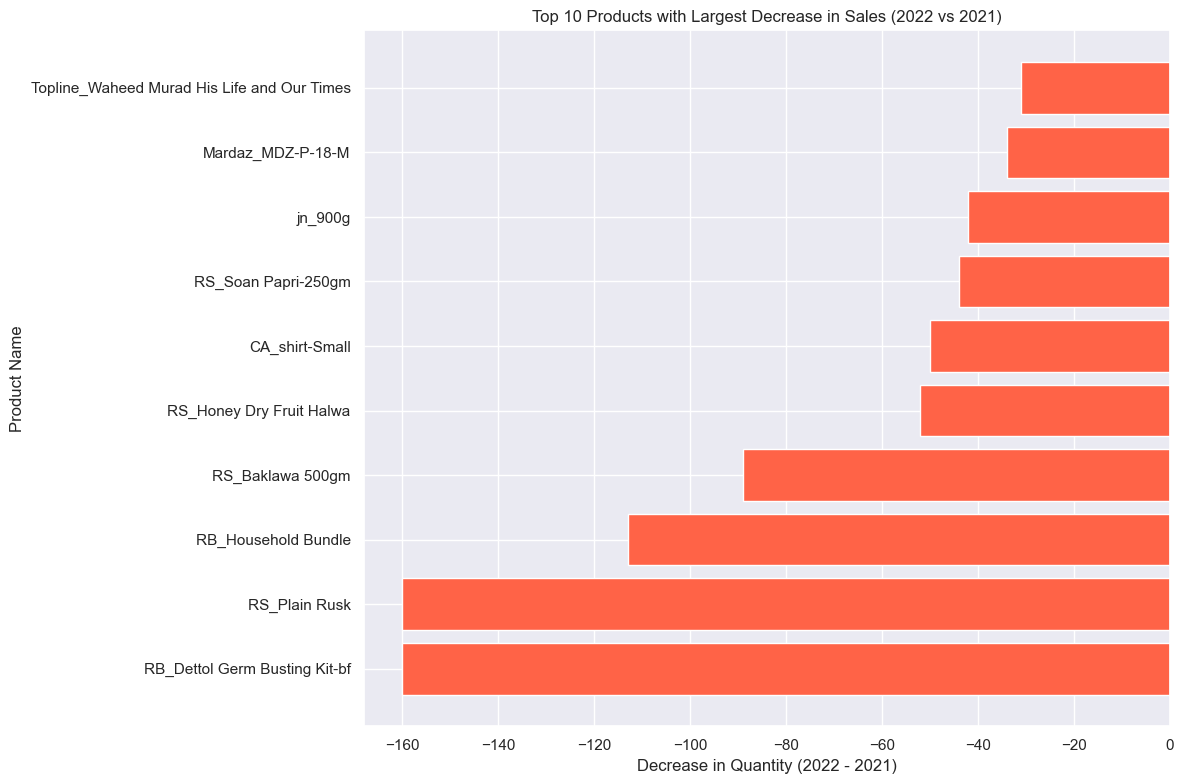

In [166]:
sns.set(style="darkgrid")

plt.figure(figsize=(12,8))

plt.barh(top10_decrease['sku_name'], top10_decrease['delta'], color='tomato')

plt.xlabel("Decrease in Quantity (2022 - 2021)")
plt.ylabel("Product Name")
plt.title("Top 10 Products with Largest Decrease in Sales (2022 vs 2021)")
plt.grid(True, axis='x')

plt.tight_layout()
plt.show()


# Task 8

Sales Prediction for the Next Quarter Using Historical Data Scenario: The Sales Team wants to predict the total sales for the next quarter (Q2 2023) based on historical sales data. Requirements:..1. Use the sales data from Q1 2022 to Q4 2022 to build a model that predicts total sales for Q2 2023. 2. Evaluate the model’s accuracy using a relevant error metric (e.g., MAE, RMSE). 3. Provide predictions for the upcoming quarter and identify any trends. Key Features to Use: • order_date • qty_ordered • Machine learning model libraries (e.g., Scikit-learn, Statsmodels)

In [180]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.4 MB/s eta 0:00:004.6 MB/s eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 4.5 MB/s eta 0:00:004.5 MB/s eta 0:00:01


In [170]:
import matplotlib.pyplot as plt

In [172]:
# Ensure date formatting
df['order_date'] = pd.to_datetime(df['order_date'])

# Create year, month
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Aggregate monthly total quantity ordered
monthly_sales = (
    df.groupby(['year','month'])['qty_ordered']
      .sum()
      .reset_index()
      .sort_values(['year','month'])
)

monthly_sales

,year,month,qty_ordered
0,2021,1,231
1,2021,2,200
2,2021,3,283
3,2021,4,122
4,2021,5,185
5,2021,6,201
6,2021,7,526
7,2021,8,527
8,2021,9,660
9,2021,10,736


In [174]:
# Create a numeric time index (1,2,3,...)
monthly_sales['time_index'] = np.arange(1, len(monthly_sales)+1)

monthly_sales


,year,month,qty_ordered,time_index
0,2021,1,231,1
1,2021,2,200,2
2,2021,3,283,3
3,2021,4,122,4
4,2021,5,185,5
5,2021,6,201,6
6,2021,7,526,7
7,2021,8,527,8
8,2021,9,660,9
9,2021,10,736,10


In [176]:
# Filter 2022 only
train_df = monthly_sales[(monthly_sales['year'] == 2022) & (monthly_sales['month'] <= 10)]
test_df  = monthly_sales[(monthly_sales['year'] == 2022) & (monthly_sales['month'] > 10)]

X_train = train_df[['time_index']]
y_train = train_df['qty_ordered']

X_test = test_df[['time_index']]
y_test = test_df['qty_ordered']

train_df, test_df


(    year  month  qty_ordered  time_index
 12  2022      1          769          13
 13  2022      2          610          14
 14  2022      3          834          15
 15  2022      4         1127          16
 16  2022      5          659          17
 17  2022      6          735          18
 18  2022      7          570          19
 19  2022      8         1228          20
 20  2022      9         1172          21
 21  2022     10          157          22,
     year  month  qty_ordered  time_index
 22  2022     11          182          23
 23  2022     12          158          24)

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)
print("\nPred vs Actual:")
pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})


MAE: 572.5
RMSE: 572.5611330776052

Pred vs Actual:


,Actual,Predicted
0,182,746.13
1,158,738.87


In [184]:
last_index = monthly_sales['time_index'].max()

future_indexes = pd.DataFrame({
    'time_index': [last_index+4, last_index+5, last_index+6]  # Apr, May, Jun 2023
})

q2_pred = model.predict(future_indexes)

q2_forecast = pd.DataFrame({
    'Month': ['April 2023','May 2023','June 2023'],
    'Predicted_Sales': q2_pred
})

q2_forecast


,Month,Predicted_Sales
0,April 2023,709.80
1,May 2023,702.53
2,June 2023,695.27


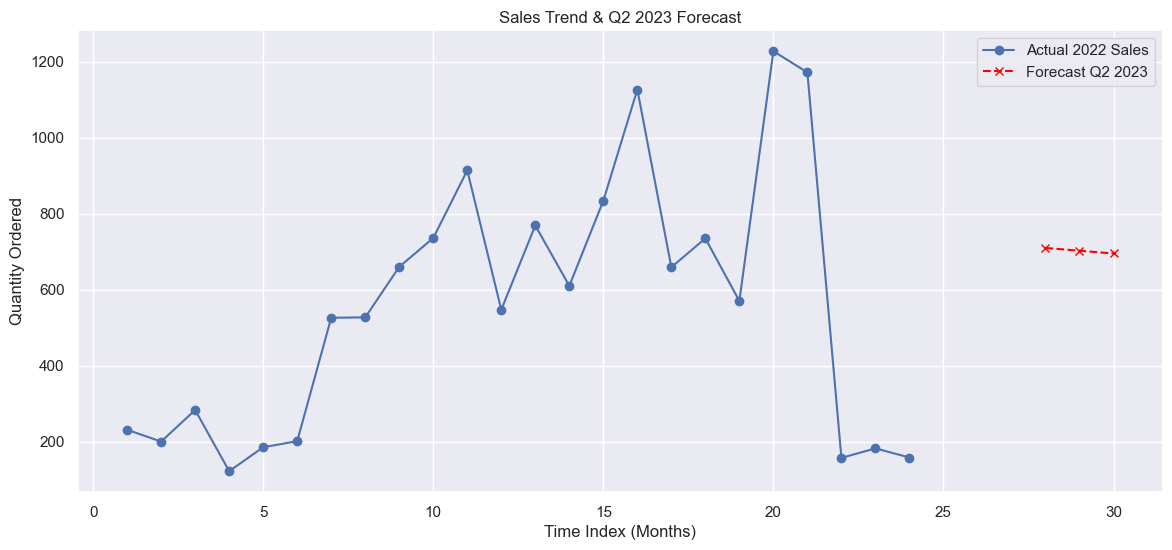

In [195]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))

# Plot actual months
plt.plot(monthly_sales['time_index'], monthly_sales['qty_ordered'], marker='o', label='Actual 2022 Sales')

# Plot forecast
plt.plot(future_indexes['time_index'], q2_pred, marker='x', linestyle='--', color='red', label='Forecast Q2 2023')

plt.xlabel("Time Index (Months)")
plt.ylabel("Quantity Ordered")
plt.title("Sales Trend & Q2 2023 Forecast")
plt.legend()
plt.show()


# Task 9

Question 1: Top 5 Products by Sales in 2022 for the "Mobiles & Tablets" Category Scenario: The Marketing Team is preparing for a Year-End Festival and needs to identify the top 5 products in the "Mobiles & Tablets" category that had the highest sales quantities in 2022. The products should be filtered to ensure only valid orders are included. Requirements: • Filter the data to include only products from the "Mobiles & Tablets" category in 2022, where the is_valid feature is set to 1. • Group the data by sku_name and category, and sum the qty_ordered for each product. • Rank the products based on their total sales quantity in descending order. • Display the top 5 products with the highest sales quantities. • Generate a horizontal bar chart showing the top 5 products by quantity. Key Features to Use: • category • order_date (for filtering by year) • is_valid (to filter valid orders) • sku_name (for product names) • qty_ordered (for sales quantities)

In [202]:
# Already solved in Task no.6. 

# Filter to Mobiles & Tablets in 2022
mob_2022 = df[
    (df['category'] == 'Mobiles & Tablets') &
    (df['is_valid'] == 1) &
    (df['order_date'].dt.year == 2022)
]

mob_2022[['order_date','sku_name','qty_ordered']].head()

,order_date,sku_name,qty_ordered
62,2022-02-23,huawei_Mate 9-mocjha brown,1
260,2022-07-24,iPhone7Plus-Red-256GB,1
304,2022-07-23,cc_samsung_G935F-Blue,3
346,2022-02-25,iphone-7-32gb-wof-Matt Black,1
491,2022-01-24,Apple iPhone 6S Plus 16GB Silver,1


In [204]:
top5_mobiles = (
    mob_2022.groupby(['sku_name','category'])['qty_ordered']
            .sum()
            .reset_index(name='total_qty')
            .sort_values('total_qty', ascending=False)
            .head(5)
            .reset_index(drop=True)
)

top5_mobiles

,sku_name,category,total_qty
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31
2,Infinix Hot 4-Gold,Mobiles & Tablets,15
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11
4,infinix_Zero 4-Grey,Mobiles & Tablets,10


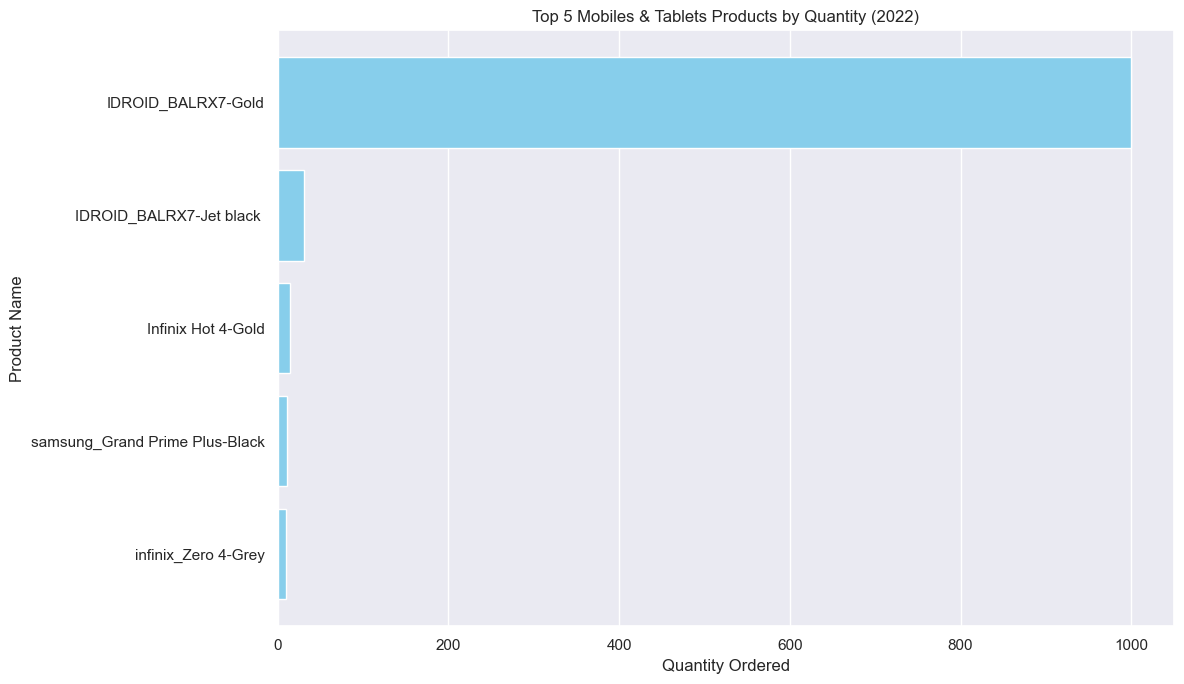

In [206]:
sns.set(style="dark")

top5_mobiles_sorted = top5_mobiles.sort_values('total_qty', ascending=True)

plt.figure(figsize=(12,7))
plt.barh(top5_mobiles_sorted['sku_name'], top5_mobiles_sorted['total_qty'], color='skyblue')

plt.xlabel("Quantity Ordered")
plt.ylabel("Product Name")
plt.title("Top 5 Mobiles & Tablets Products by Quantity (2022)")
plt.grid(True, axis='x')

plt.tight_layout()
plt.show()


# Task 10

Identifying Customers Who Completed Checkout but Didn't Pay in 2022 Scenario: The Digital Marketing Team wants to identify customers who completed the checkout process but did not make a payment in 2022. This will help them reach out for promotional purposes. Requirements: • Filter the data to find records where is_gross is 1 (indicating completed che• Retrieve the customer_id and registered_date for these records. • Ensure there are no duplicate customer_id entries. • Share the compiled data with the Marketing Team. Key Features to Use: • is_gross (for checkout status) • is_valid, is_net (to filter invalid or net transactions) • order_date (for filtering by year) • customer_id • registered_dateckout but no payment), is_valid is 0, and is_net is 0, for the year 2022.


In [210]:
# Filter: checkout completed but no payment (2022 only)
cs_unpaid = df[
    (df['is_gross'] == 1) &      # Checkout completed
    (df['is_valid'] == 0) &      # Not valid (meaning payment not completed)
    (df['is_net'] == 0) &        # Net not processed
    (df['order_date'].dt.year == 2022)
][['customer_id', 'registered_date']]


In [212]:
# for duplicates
print("Before removing duplicates:")
print("Unique customer_id:", cs_unpaid['customer_id'].nunique())
print("Total rows:", len(cs_unpaid))


Before removing duplicates:
Unique customer_id: 820
Total rows: 1023


In [214]:
cs_unpaid_clean = cs_unpaid.drop_duplicates().reset_index(drop=True)

print("\nAfter removing duplicates:")
print("Unique customer_id:", cs_unpaid_clean['customer_id'].nunique())
print("Total rows:", len(cs_unpaid_clean))

cs_unpaid_clean.head()



After removing duplicates:
Unique customer_id: 820
Total rows: 820


,customer_id,registered_date
0,C993531L,2021-11-08
1,C652751L,2022-07-19
2,C189144L,2022-07-01
3,C224183L,2022-04-07
4,C907186L,2022-05-08


In [216]:
cs_unpaid_clean


,customer_id,registered_date
0,C993531L,2021-11-08
1,C652751L,2022-07-19
2,C189144L,2022-07-01
3,C224183L,2022-04-07
4,C907186L,2022-05-08
...,...,...
815,C118563L,2022-06-07
816,C217246L,2022-08-04
817,C577176L,2022-06-01
818,C744990L,2022-05-21


In [218]:
cs_unpaid_clean.to_csv("/Users/adityabasude/Desktop/NullCL/unpaidCustomers2022.csv", index=False)

print("Exported successfully!")


Exported successfully!


# Task 11

In [222]:
# Net profit per transaction
df['net_profit'] = df['after_discount'] - df['cogs']

# Aggregate total net profit per customer
customer_profit = df.groupby('customer_id')['net_profit'].sum().reset_index()
customer_profit.head()


,customer_id,net_profit
0,C107850L,"1,137,550.00"
1,C110122L,"72,384.00"
2,C111666L,"1,211,040.00"
3,C111795L,"81,432.00"
4,C111808L,"117,334.00"


In [224]:
# Function for segmentation
def categorize(x):
    if x < 100:
        return "Low"
    elif x <= 500:
        return "Medium"
    else:
        return "High"

# Apply segmentation
customer_profit['segment'] = customer_profit['net_profit'].apply(categorize)

# Show distribution
segment_counts = customer_profit['segment'].value_counts()
segment_counts


segment
High      3877
Low        116
Medium       5
Name: count, dtype: int64

In [228]:
customer_profit.head() 

,customer_id,net_profit,segment
0,C107850L,"1,137,550.00",High
1,C110122L,"72,384.00",High
2,C111666L,"1,211,040.00",High
3,C111795L,"81,432.00",High
4,C111808L,"117,334.00",High


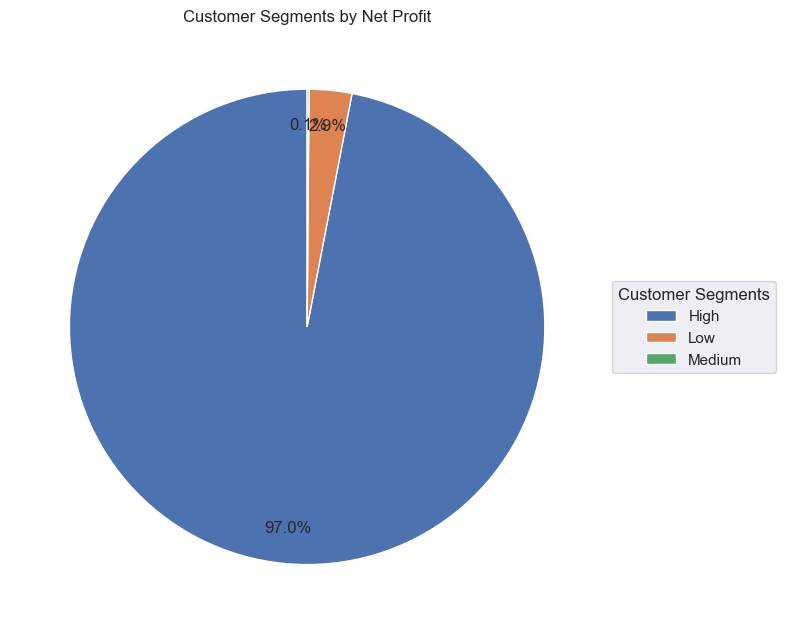

In [238]:
plt.figure(figsize=(8,8))

plt.pie(
    segment_counts, 
    labels=None,                
    autopct='%1.1f%%', 
    startangle=90,
    pctdistance=0.85             
)

# Add legend outside the pie
plt.legend(
    segment_counts.index, 
    title="Customer Segments", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5)
)

plt.title("Customer Segments by Net Profit")
plt.tight_layout()
plt.show()


# Task 12

Sales Breakdown by Discount Range Scenario: The Marketing Team wants to understand the impact of different discount ranges on sales. Requirements: • Create a calculated field that segments discounts into categories: o No Discount: discount_amount = 0 o Low Discount: discount_amount < 10 o Medium Discount: discount_amount between 10 and 20 o High Discount: discount_amount > 20 • Create a bar chart that shows the sales (SUM(before_discount)) for each discount category. Key Features to Use: • discount_amount • before_discount

In [246]:
# Create a discount segment column
def discount_segment(x):
    if x == 0:
        return "No Discount"
    elif x < 10:
        return "Low Discount"
    elif 10 <= x <= 20:
        return "Medium Discount"
    else:
        return "High Discount"

df['discount_segment'] = df['discount_amount'].apply(discount_segment)

df[['discount_amount', 'discount_segment']].head()


,discount_amount,discount_segment
0,0.00,No Discount
1,0.00,No Discount
2,0.00,No Discount
3,0.00,No Discount
4,0.00,No Discount


In [248]:
sales_by_discount = (
    df.groupby('discount_segment')['before_discount']
      .sum()
      .reset_index()
      .sort_values('before_discount', ascending=False)
)

sales_by_discount


,discount_segment,before_discount
2,No Discount,"8,169,933,228.80"
0,High Discount,"378,172,714.00"
1,Low Discount,"347,710.00"


/var/folders/f2/j43_gc_n0fx_h470448phbdw0000gn/T/ipykernel_26447/2514027332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


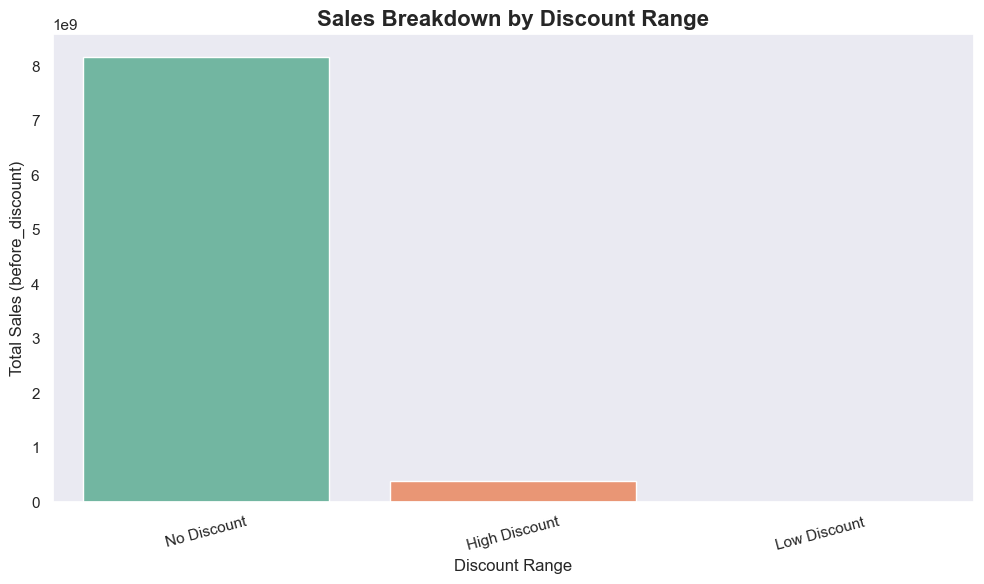

In [252]:
sns.set_style("dark")
plt.figure(figsize=(10,6))

sns.barplot(
    data=sales_by_discount,
    x='discount_segment',
    y='before_discount',
    palette='Set2'
)

plt.title("Sales Breakdown by Discount Range", fontsize=16, weight='bold')
plt.xlabel("Discount Range", fontsize=12)
plt.ylabel("Total Sales (before_discount)", fontsize=12)

# Rotate labels for readability if needed
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


# Task 13

Product Category Performance by Net Profit Scenario: The Operations Team wants to analyze the net profit for each product category to identify the most profitable categories. Requirements: • Create a bar chart that shows the total net profit (SUM(after_discount - cogs)) for each product category. • Sort the categories by the highest to lowest net profit. • Include a slicer to filter by year. Key Features to Use: • category • after_discount • cogs


In [258]:
# Creating year column 
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['year'] = df['order_date'].dt.year

# net profit per row
df['net_profit'] = df['after_discount'] - df['cogs']

df[['category','after_discount','cogs','net_profit']].head()


,category,after_discount,cogs,net_profit
0,Home & Living,"62,002.00","51,156.00","10,846.00"
1,Health & Sports,"159,500.00","97,266.00","62,234.00"
2,Entertainment,"919,300.00","671,060.00","248,240.00"
3,Beauty & Grooming,"59,856.00","53,824.00","6,032.00"
4,Books,"34,510.00","29,290.00","5,220.00"


In [262]:
# Filter by Year & Aggregate Category with Net Profit

def category_profit_by_year(selected_year):
    
    # Filter by selected year
    df_year = df[df['year'] == selected_year]
    
    # Aggregate net profit per category
    category_profit = (
        df_year.groupby('category')['net_profit']
               .sum()
               .reset_index()
               .sort_values('net_profit', ascending=False)
    )
    
    return category_profit


In [264]:
# filtering by year

test_output = category_profit_by_year(2022)
test_output


,category,net_profit
9,Mobiles & Tablets,"1,498,853,120.00"
4,Entertainment,"328,020,986.00"
0,Appliances,"209,747,168.00"
3,Computing,"184,500,472.00"
14,Women Fashion,"61,308,605.00"
8,Men Fashion,"45,142,912.00"
6,Home & Living,"43,450,576.40"
1,Beauty & Grooming,"38,138,086.00"
13,Superstore,"26,577,424.90"
5,Health & Sports,"25,875,548.70"


/var/folders/f2/j43_gc_n0fx_h470448phbdw0000gn/T/ipykernel_26447/1727405576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


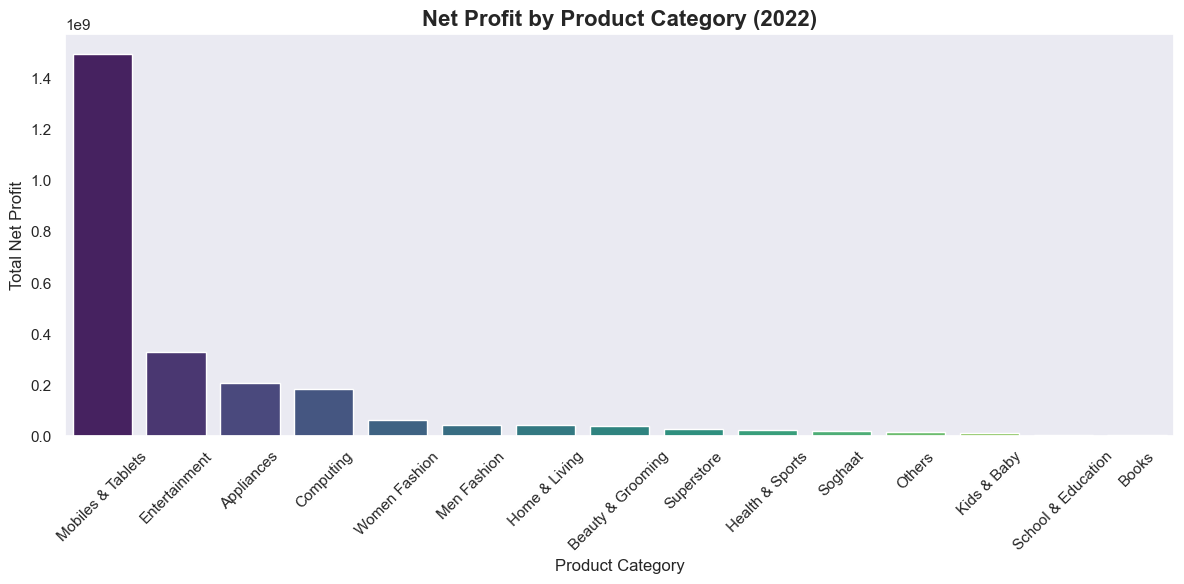

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_category_profit(selected_year):
    
    cat_df = category_profit_by_year(selected_year)

    plt.figure(figsize=(12,6))
    sns.barplot(
        data=cat_df,
        x='category',
        y='net_profit',
        palette='viridis'
    )
    
    plt.title(f"Net Profit by Product Category ({selected_year})", fontsize=16, weight='bold')
    plt.xlabel("Product Category", fontsize=12)
    plt.ylabel("Total Net Profit", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example:
plot_category_profit(2022)


/var/folders/f2/j43_gc_n0fx_h470448phbdw0000gn/T/ipykernel_26447/1727405576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


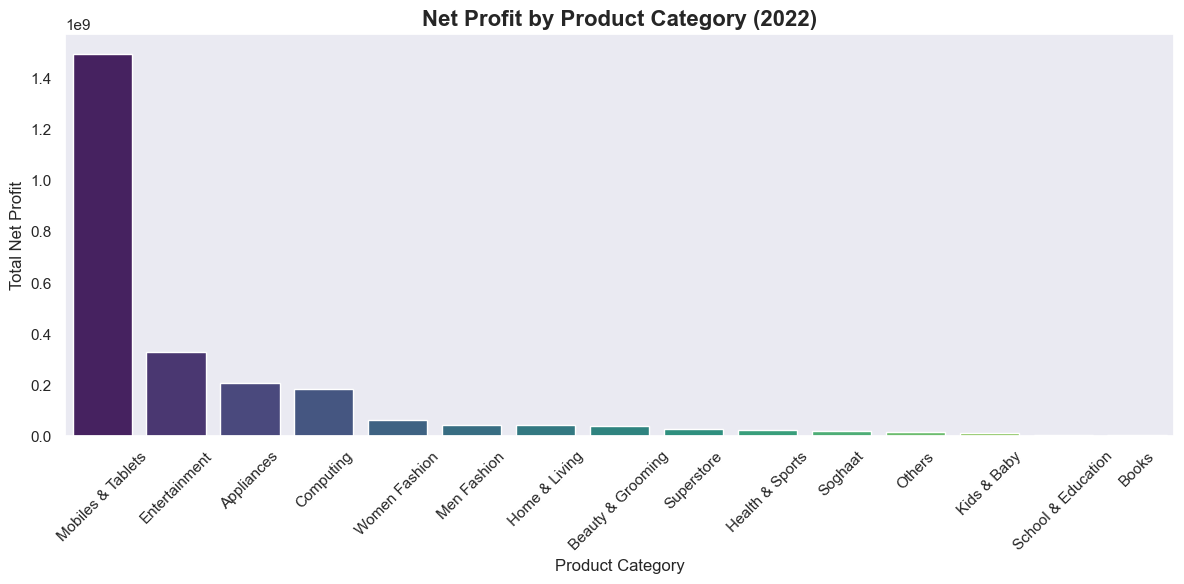

In [270]:
# adding own slicer


# Select year manually (this replaces the slicer)
selected_year = 2022   # <-- change this to any available year

plot_category_profit(selected_year)


# Task 14

Sales Performance Based on Payment Method Scenario: The Finance Team wants to understand how each payment method performs in terms of revenue, quantity sold, and net profit. Requirements: • Create a table that lists each payment method (payment_method) along with: o Total sales (SUM(before_discount)) o Total quantity sold (SUM(qty_ordered)) o Total net profit (SUM(after_discount - cogs)) • Add filters to view this data by month or quarter. Key Features to Use: • payment_method.• before_discount • qty_ordered • cogs

In [276]:
# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Creating date columns
df['month'] = df['order_date'].dt.month
df['quarter'] = df['order_date'].dt.quarter

# Calculating net profit
df['net_profit'] = df['after_discount'] - df['cogs']

df[['payment_method', 'before_discount', 'qty_ordered', 'net_profit']].head()


,payment_method,before_discount,qty_ordered,net_profit
0,jazzwallet,"62,002.00",1,"10,846.00"
1,cod,"159,500.00",1,"62,234.00"
2,ublcreditcard,"919,300.00",1,"248,240.00"
3,cod,"59,856.00",1,"6,032.00"
4,cod,"34,510.00",1,"5,220.00"


In [278]:
# Own Function to Filter by Month or Quarter

def payment_method_performance(month=None, quarter=None):

    df_filtered = df.copy()

    if month is not None:
        df_filtered = df_filtered[df_filtered['month'] == month]

    if quarter is not None:
        df_filtered = df_filtered[df_filtered['quarter'] == quarter]

    # Aggregate metrics
    result = (
        df_filtered.groupby('payment_method')
                   .agg(
                       total_sales=('before_discount', 'sum'),
                       total_qty=('qty_ordered', 'sum'),
                       total_net_profit=('net_profit', 'sum')
                   )
                   .reset_index()
                   .sort_values('total_sales', ascending=False)
    )

    return result


In [280]:
payment_method_performance()


,payment_method,total_sales,total_qty,total_net_profit
4,cod,"2,896,852,795.90",7408,"919,304,375.00"
2,Payaxis,"2,363,378,242.90",1633,"899,441,404.52"
9,jazzvoucher,"1,181,141,060.00",2096,"1,097,906,560.20"
0,Easypay,"798,164,160.00",616,"289,465,694.40"
15,ublcreditcard,"371,947,278.00",163,"188,713,532.00"
13,mygateway,"332,155,410.00",141,"201,544,250.00"
8,internetbanking,"120,051,474.00",69,"62,949,212.00"
1,Easypay_MA,"102,284,452.00",47,"81,307,237.00"
12,mcblite,"90,465,704.00",47,"67,472,708.00"
3,cashatdoorstep,"85,083,348.00",209,"70,959,878.00"


In [282]:
# Viewing a table of suppose march month

payment_method_performance(month=3)


,payment_method,total_sales,total_qty,total_net_profit
4,cod,"304,308,264.00",701,"105,344,468.00"
2,Payaxis,"129,413,926.00",76,"39,539,516.00"
0,Easypay,"121,580,936.00",99,"45,596,244.50"
10,mygateway,"71,822,010.00",39,"66,930,178.00"
7,internetbanking,"13,869,134.00",2,"4,139,692.00"
11,ublcreditcard,"10,549,810.00",8,"6,591,600.00"
5,customercredit,"5,496,370.00",26,"1,487,814.00"
1,Easypay_MA,"4,993,912.00",7,"1,379,414.00"
6,easypay_voucher,"4,905,290.00",2,"1,364,270.00"
8,jazzvoucher,"4,350,000.00",3,"2,167,982.00"


In [284]:
# view a table for Q2

payment_method_performance(quarter=2)


,payment_method,total_sales,total_qty,total_net_profit
2,Payaxis,"587,181,414.90",389,"214,014,533.80"
4,cod,"582,900,252.80",1878,"186,021,306.60"
0,Easypay,"411,845,358.00",366,"151,102,580.00"
1,Easypay_MA,"94,628,688.00",33,"79,335,523.00"
3,cashatdoorstep,"72,690,140.00",25,"62,983,954.00"
9,jazzvoucher,"34,098,914.00",12,"5,432,348.00"
14,ublcreditcard,"26,007,690.00",11,"15,214,824.00"
8,internetbanking,"22,905,360.00",5,"8,404,954.00"
5,customercredit,"19,721,044.00",28,"3,860,194.00"
10,jazzwallet,"17,605,086.00",258,"6,422,176.00"


# Task 15

Unique Customers and Repeat Purchases Analysis Scenario: The Customer Service Team wants to analyze how many customers made multiple purchases in 2022. Requirements: • Create a calculated field to count the number of distinct customers who made at least two purchases. Use the formula COUNT_DISTINCT(customer_id). • Create a scorecard showing the number of customers who made only one purchase and those who made more than one purchase. • Display the ratio of repeat customers to new customers. Key Features to Use: • customer_id • order_date

In [288]:
# filtering for the year 2022

df_2022 = df[df["order_date"].dt.year == 2022].copy()


In [293]:
# Count purchase per customer

purchase_counts = (
    df_2022.groupby("customer_id")
            .size()
            .reset_index(name="purchase_count")
)

purchase_counts.head()


,customer_id,purchase_count
0,C107850L,1
1,C110122L,1
2,C111795L,2
3,C111808L,1
4,C112088L,1


In [295]:
# One time vs Repeat Customers

one_purchase = purchase_counts[purchase_counts["purchase_count"] == 1].shape[0]
repeat_purchase = purchase_counts[purchase_counts["purchase_count"] > 1].shape[0]

print("Customers with only ONE purchase:", one_purchase)
print("Customers with MORE THAN ONE purchase:", repeat_purchase)


Customers with only ONE purchase: 2006
Customers with MORE THAN ONE purchase: 353


In [297]:
# repeat Customer ratio

ratio = repeat_purchase / one_purchase if one_purchase != 0 else float('inf')
print("Repeat Customer Ratio:", ratio)


Repeat Customer Ratio: 0.17597208374875373


# Task 16

Monthly Sales Growth vs Discount Rate Scenario: The Sales Team wants to track the relationship between monthly sales growth and the discount rate applied. Requirements: • Create a combo chart showing monthly sales growth ((current_month_sales - previous_month_sales) / previous_month_sales) on the primary axis. • Create a secondary axis showing the average discount rate per month (SUM(discount_amount) / SUM(before_discount)). • Add a line for discount rate and bars for sales growth. Key Features to Use: • order_date • before_discount • discount_amount


In [309]:
# Create month/year columns
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_start'] = df['order_date'].dt.to_period('M').dt.to_timestamp()

# Aggregate monthly sums: sales (before_discount) and total discount amount
monthly = (df.groupby('month_start')
             .agg(
                 total_sales=('before_discount', 'sum'),
                 total_discount_amt=('discount_amount', 'sum')
             )
             .sort_index()
             .reset_index()
          )

# Compute avg discount rate per month = SUM(discount_amount) / SUM(before_discount)
# handle division by zero
monthly['avg_discount_rate'] = np.where(
    monthly['total_sales'] == 0,
    0.0,
    monthly['total_discount_amt'] / monthly['total_sales']
)

# Compute month-over-month sales growth: (curr - prev) / prev
monthly['prev_month_sales'] = monthly['total_sales'].shift(1)
monthly['sales_growth'] = np.where(
    monthly['prev_month_sales'].isna() | (monthly['prev_month_sales'] == 0),
    np.nan,  # undefined growth for first month or when prev==0
    (monthly['total_sales'] - monthly['prev_month_sales']) / monthly['prev_month_sales']
)

# For readability: add formatted columns
monthly['total_sales_display'] = monthly['total_sales']
monthly['avg_discount_rate_pct'] = monthly['avg_discount_rate'] * 100

# show the table
monthly[['month_start','total_sales','prev_month_sales','sales_growth','avg_discount_rate_pct']]


,month_start,total_sales,prev_month_sales,sales_growth,avg_discount_rate_pct
0,2021-01-01,"118,209,940.50",NaN,NaN,0.52
1,2021-02-01,"114,136,205.00","118,209,940.50",-0.03,0.00
2,2021-03-01,"174,921,428.00","114,136,205.00",0.53,0.01
3,2021-04-01,"80,983,699.00","174,921,428.00",-0.54,0.04
4,2021-05-01,"105,587,374.00","80,983,699.00",0.30,0.08
5,2021-06-01,"110,328,118.00","105,587,374.00",0.04,0.05
6,2021-07-01,"489,091,987.40","110,328,118.00",3.43,0.02
7,2021-08-01,"436,548,162.00","489,091,987.40",-0.11,0.01
8,2021-09-01,"453,686,394.00","436,548,162.00",0.04,0.15
9,2021-10-01,"478,397,032.50","453,686,394.00",0.05,0.01


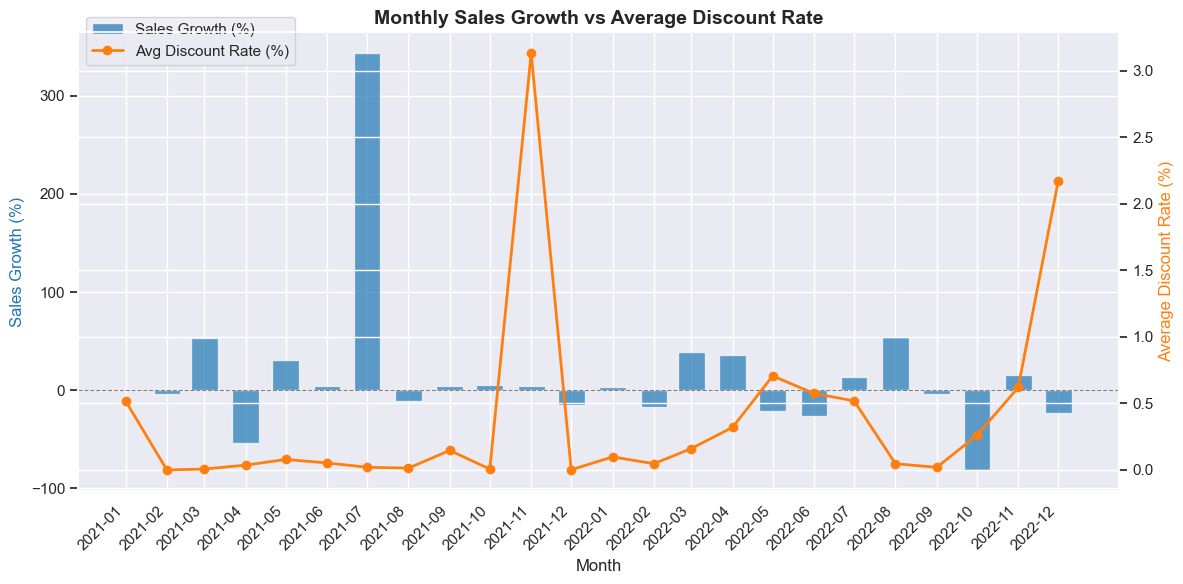

In [307]:
# Plot settings
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))

ax = plt.gca()

# X values and labels
x = monthly['month_start']
x_labels = [ts.strftime('%Y-%m') for ts in x]

# Plot bars: sales growth (as percent)
# Multiply by 100 for percentage bars
bar_vals = monthly['sales_growth'] * 100

# Draw bars (handle NaN by treating them as 0 height but visually we can skip first)
ax.bar(x, bar_vals, width=20, align='center', color='tab:blue', alpha=0.7, label='Sales Growth (%)')

# Secondary axis for avg discount rate
ax2 = ax.twinx()
ax2.plot(x, monthly['avg_discount_rate_pct'], color='tab:orange', marker='o', linewidth=2, label='Avg Discount Rate (%)')

# Labels & title
ax.set_xlabel('Month')
ax.set_ylabel('Sales Growth (%)', color='tab:blue', fontsize=12)
ax2.set_ylabel('Average Discount Rate (%)', color='tab:orange', fontsize=12)
plt.title('Monthly Sales Growth vs Average Discount Rate', fontsize=14, weight='bold')

# X ticks formatting
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Add horizontal line at 0% growth
ax.axhline(0, color='gray', linewidth=0.8, linestyle='--')

# Legends: combine both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0,1.05))

plt.tight_layout()
plt.show()


# Task 17

The Sales Team wants to analyze the average time it takes for customers to place their first order after registration. * Create a calculated field to calculate the days between the customer registration date (registered_date) and the first order date (order_date). Use the formula: DATE_DIFF(order_date, registered_date, DAY). * Create a scorecard showing the average number of days for customers to place their first order. * Create a histogram to visualize the distribution of the time taken for customers to place their first order.

In [313]:
# Ensuring again the datetime format
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["registered_date"] = pd.to_datetime(df["registered_date"], errors="coerce")

# Sorting by customer and order date so the first order is detected correctly
df_sorted = df.sort_values(by=["customer_id", "order_date"])


In [315]:
# Finding only the FIRST order per customer
first_orders = (
    df_sorted.groupby("customer_id")
             .first()
             .reset_index()[["customer_id", "registered_date", "order_date"]]
)

first_orders.head()


,customer_id,registered_date,order_date
0,C107850L,2022-08-03,2022-04-08
1,C110122L,2022-08-14,2022-08-13
2,C111666L,2021-08-03,2021-08-08
3,C111795L,2022-08-06,2022-03-08
4,C111808L,2022-05-23,2022-05-13


In [317]:
# Calculate the days difference
first_orders["days_to_first_order"] = (
    first_orders["order_date"] - first_orders["registered_date"]
).dt.days

first_orders.head()


,customer_id,registered_date,order_date,days_to_first_order
0,C107850L,2022-08-03,2022-04-08,-117
1,C110122L,2022-08-14,2022-08-13,-1
2,C111666L,2021-08-03,2021-08-08,5
3,C111795L,2022-08-06,2022-03-08,-151
4,C111808L,2022-05-23,2022-05-13,-10


In [319]:
# Remove negative or invalid differences 
valid_first_orders = first_orders[first_orders["days_to_first_order"] >= 0]

average_days = valid_first_orders["days_to_first_order"].mean().round(2)

average_days


np.float64(72.22)

In [321]:
average_days

np.float64(72.22)

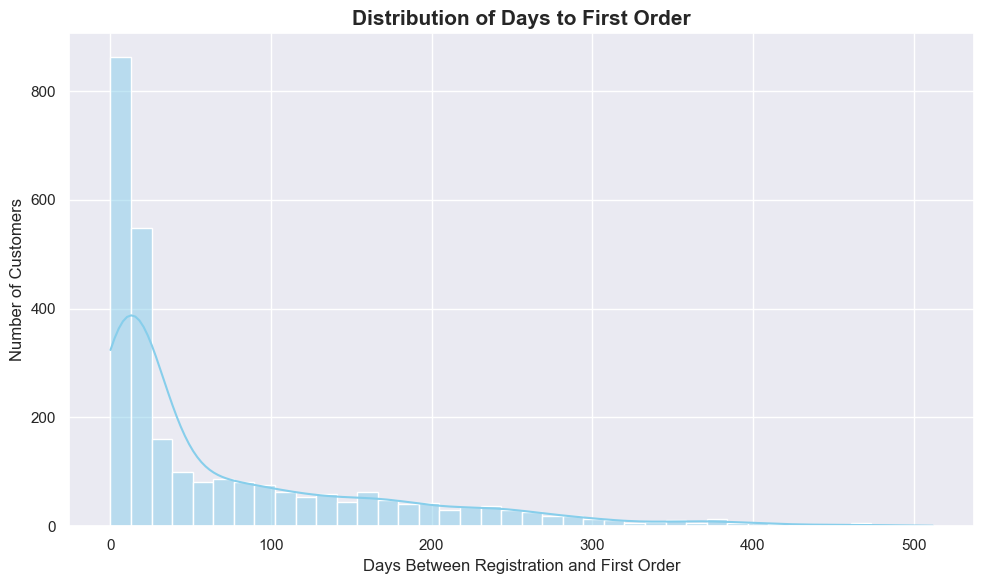

In [323]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))

sns.histplot(valid_first_orders["days_to_first_order"], 
             bins=40, kde=True, color="skyblue")

plt.title("Distribution of Days to First Order", fontsize=15, weight='bold')
plt.xlabel("Days Between Registration and First Order")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()


# Task 18

Average Quantity Sold per Product by Category Scenario: The Product Team wants to know the average quantity sold for each product category to identify potential inventory issues. Requirements: • Create a bar chart that shows the average quantity sold (AVG(qty_ordered)) for each product category. • Sort the categories by average quantity sold in descending order. Key Features to Use: • category • qty_ordered

In [327]:
# Average Quantity per category
avg_qty_by_category = (
    df.groupby("category")["qty_ordered"]
      .mean()
      .reset_index(name="avg_qty_sold")
      .sort_values("avg_qty_sold", ascending=False)
)

avg_qty_by_category


,category,avg_qty_sold
9,Mobiles & Tablets,6.79
12,Soghaat,5.94
13,Superstore,3.45
14,Women Fashion,2.10
10,Others,2.04
8,Men Fashion,2.03
1,Beauty & Grooming,1.56
2,Books,1.44
6,Home & Living,1.40
11,School & Education,1.34


/var/folders/f2/j43_gc_n0fx_h470448phbdw0000gn/T/ipykernel_26447/3347799223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


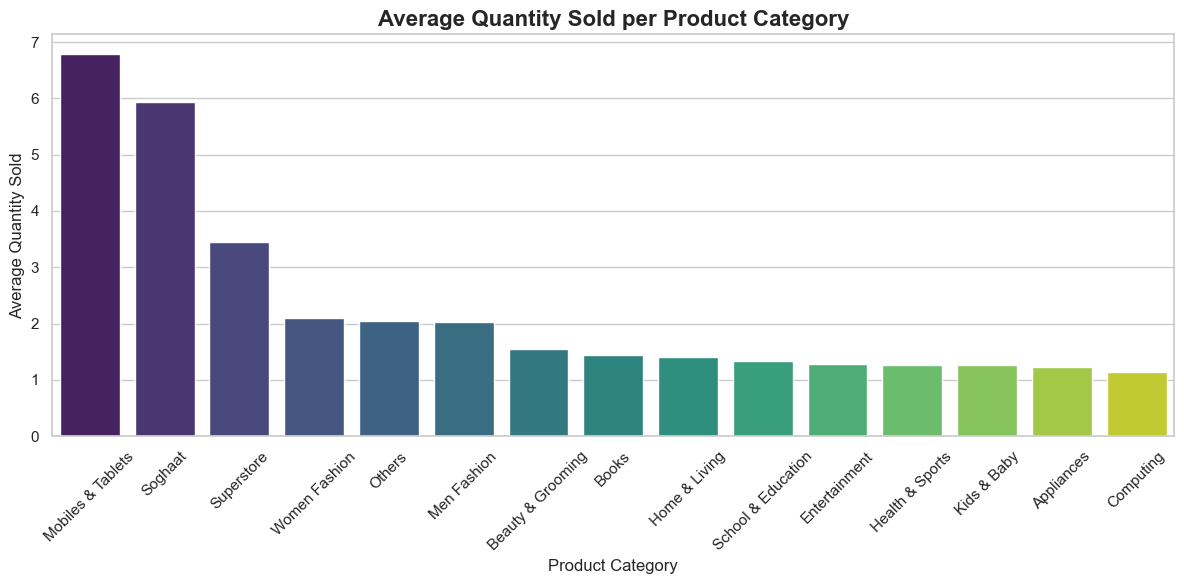

In [329]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.barplot(
    data=avg_qty_by_category,
    x="category",
    y="avg_qty_sold",
    palette="viridis"
)

plt.title("Average Quantity Sold per Product Category", fontsize=16, weight='bold')
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Average Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Task 19

Total Revenue vs Discount Impact by Category Scenario: The Marketing Team wants to analyze the total revenue for each product category before and after applying discounts. They also want to visualize the discount impact on revenue across different categories. Requirements: • Create a bar chart showing total revenue (before and after discount) for each product category. • Use the formula SUM(before_discount) for total revenue before discount and SUM(after_discount) for total revenue after discount. • Add a calculated field to show the discount impact (before_discount - after_discount). • Visualize the difference in revenue for each category. Key Features to Use: • category • before_discount • after_discount

In [333]:
# Revenue BEfore & after discount per category
revenue_cat = (
    df.groupby("category")
      .agg(
          revenue_before=("before_discount", "sum"),
          revenue_after=("after_discount", "sum")
      )
      .reset_index()
)

# Calculate discount impact
revenue_cat["discount_impact"] = (
    revenue_cat["revenue_before"] - revenue_cat["revenue_after"]
)

# Sort by highest discount impact
revenue_cat = revenue_cat.sort_values("discount_impact", ascending=False)

revenue_cat


,category,revenue_before,revenue_after,discount_impact
4,Entertainment,"1,295,031,180.00","1,286,165,640.00","8,865,540.00"
0,Appliances,"1,168,138,242.00","1,163,483,732.00","4,654,510.00"
9,Mobiles & Tablets,"3,425,097,634.00","3,421,068,124.00","4,029,510.00"
10,Others,"151,148,058.00","147,756,515.10","3,391,542.90"
3,Computing,"1,173,403,812.00","1,170,537,120.00","2,866,692.00"
13,Superstore,"97,774,924.20","94,978,864.90","2,796,059.30"
6,Home & Living,"209,542,048.00","208,216,946.40","1,325,101.60"
8,Men Fashion,"274,741,914.00","273,494,336.00","1,247,578.00"
5,Health & Sports,"147,144,664.00","145,964,156.30","1,180,507.70"
14,Women Fashion,"264,862,357.40","263,749,172.40","1,113,185.00"


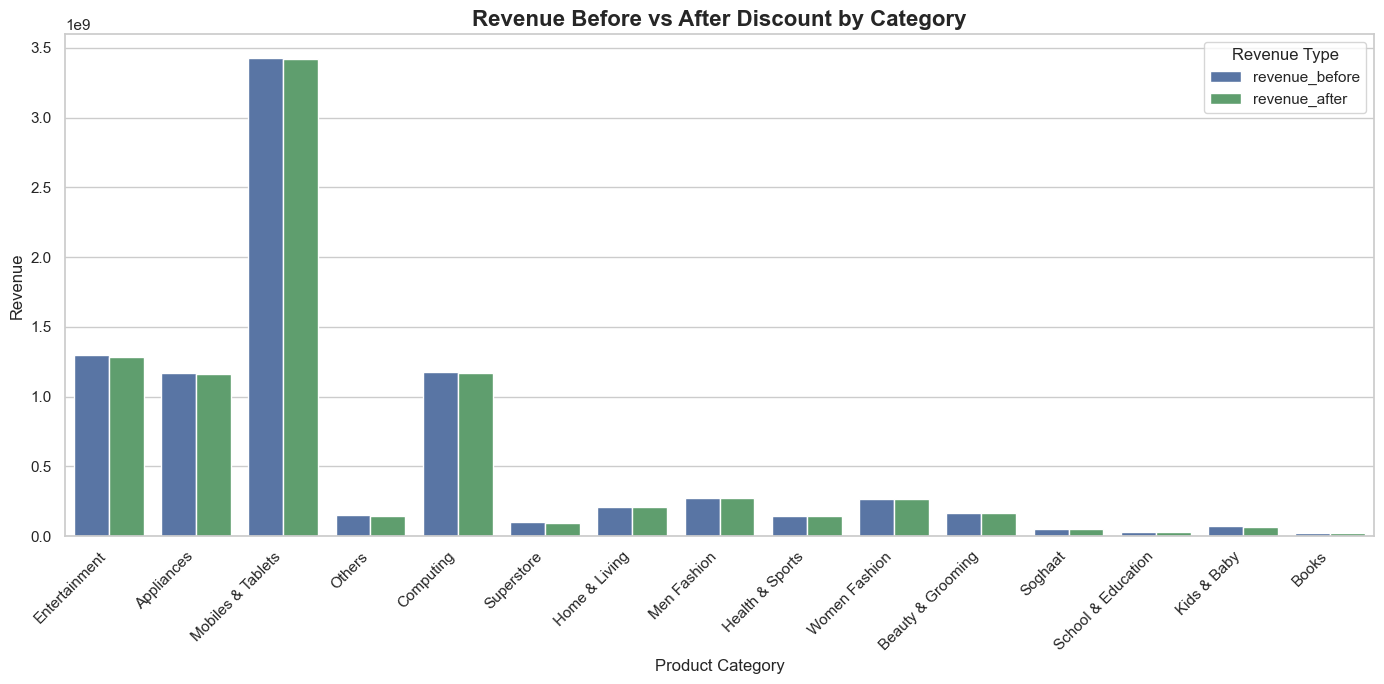

In [335]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

# Melt the dataframe to long format for easier plotting
plot_df = revenue_cat.melt(
    id_vars="category",
    value_vars=["revenue_before", "revenue_after"],
    var_name="Revenue_Type",
    value_name="Revenue"
)

sns.barplot(
    data=plot_df,
    x="category",
    y="Revenue",
    hue="Revenue_Type",
    palette=["#4C72B0", "#55A868"]
)

plt.title("Revenue Before vs After Discount by Category", fontsize=16, weight="bold")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Revenue Type")
plt.tight_layout()
plt.show()


/var/folders/f2/j43_gc_n0fx_h470448phbdw0000gn/T/ipykernel_26447/1420505717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


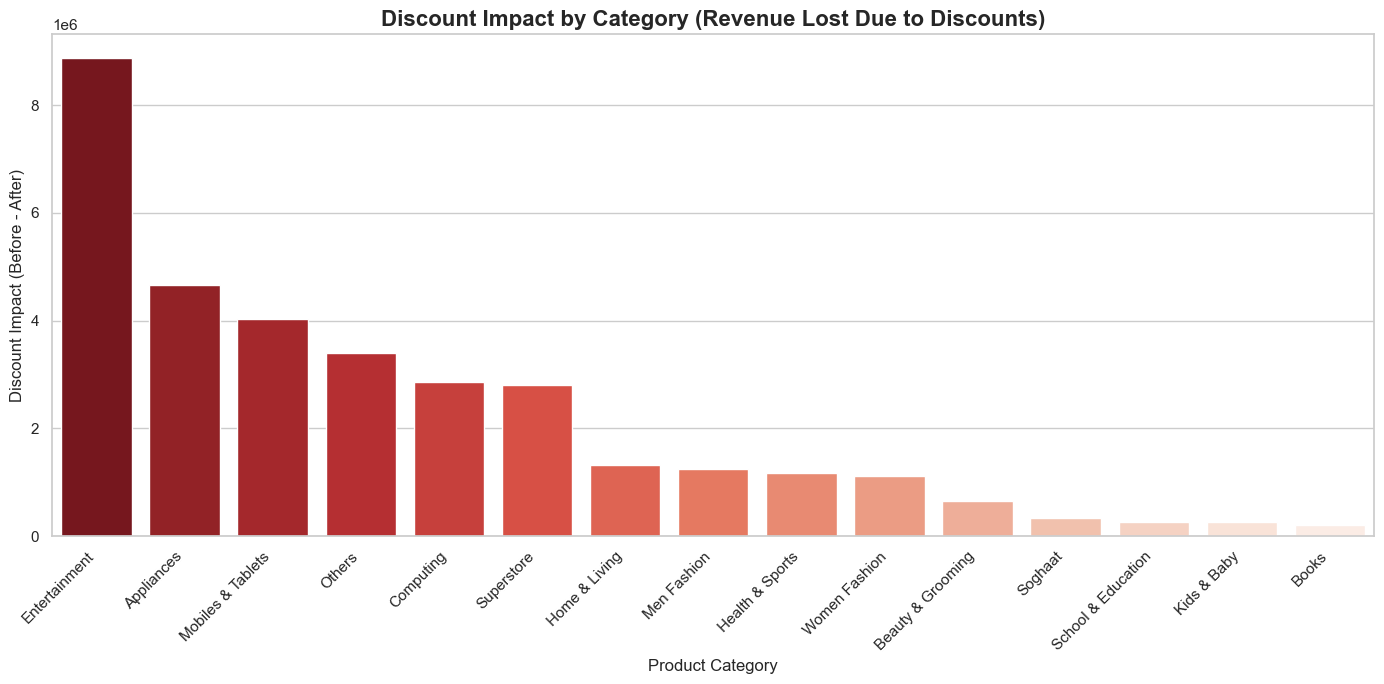

In [337]:
plt.figure(figsize=(14,7))

sns.barplot(
    data=revenue_cat,
    x="category",
    y="discount_impact",
    palette="Reds_r"
)

plt.title("Discount Impact by Category (Revenue Lost Due to Discounts)", fontsize=16, weight="bold")
plt.xlabel("Product Category")
plt.ylabel("Discount Impact (Before - After)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Task 1

Sales Prediction for the Next Quarter Using Historical Data Scenario: The Sales Team wants to predict the total sales for the next quarter (Q2 2023) based on historical sales data. Requirements:..1. Use the sales data from Q1 2022 to Q4 2022 to build a model that predicts total sales for Q2 2023. 2. Evaluate the model’s accuracy using a relevant error metric (e.g., MAE, RMSE). 3. Provide predictions for the upcoming quarter and identify any trends. Key Features to Use: • order_date • qty_ordered • Machine learning model libraries (e.g., Scikit-learn, Statsmodels)


In [341]:
# Aggregate monthly sales (qty_ordered)
# Creating year and month columns
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

monthly_sales = (
    df.groupby(['year','month'])['qty_ordered']
      .sum()
      .reset_index()
      .sort_values(['year','month'])
)

# Show monthly_sales to verify
display(monthly_sales.head(15))


,year,month,qty_ordered
0,2021,1,231
1,2021,2,200
2,2021,3,283
3,2021,4,122
4,2021,5,185
5,2021,6,201
6,2021,7,526
7,2021,8,527
8,2021,9,660
9,2021,10,736


In [343]:
# Prepare for training training (Jan-Oct train, Nov-Dec test for 2022)
# Filtering 2022 months only and build a time_index
df_2022 = monthly_sales[monthly_sales['year'] == 2022].copy()
df_2022 = df_2022.reset_index(drop=True)
df_2022['time_index'] = np.arange(1, len(df_2022)+1)  # 1..12 for 2022 months

# Split: train = months 1..10, test = 11..12
train = df_2022[df_2022['month'] <= 10].copy()
test  = df_2022[df_2022['month'] > 10].copy()

print("TRAIN months:", train[['year','month','qty_ordered','time_index']].to_string(index=False))
print("\nTEST months:", test[['year','month','qty_ordered','time_index']].to_string(index=False))


TRAIN months:  year  month  qty_ordered  time_index
 2022      1          769           1
 2022      2          610           2
 2022      3          834           3
 2022      4         1127           4
 2022      5          659           5
 2022      6          735           6
 2022      7          570           7
 2022      8         1228           8
 2022      9         1172           9
 2022     10          157          10

TEST months:  year  month  qty_ordered  time_index
 2022     11          182          11
 2022     12          158          12


In [345]:
# Fit a simple linear trend numpy.polyfit and evaluate on test

m, b = np.polyfit(train['time_index'].values, train['qty_ordered'].values, 1)

# Predict on test
test_preds = m * test['time_index'].values + b

# Evaluation metrics
mae = np.mean(np.abs(test['qty_ordered'].values - test_preds))
rmse = np.sqrt(np.mean((test['qty_ordered'].values - test_preds)**2))

print(f"Linear model: qty = {m:.4f} * time_index + {b:.4f}")
print("\nTest Actuals:", test['qty_ordered'].values)
print("Test Predictions:", np.round(test_preds,2))
print(f"\nMAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Linear model: qty = -7.2667 * time_index + 826.0667

Test Actuals: [182 158]
Test Predictions: [746.13 738.87]

MAE: 572.50
RMSE: 572.56


In [347]:
# Forecast Q2 2023 (Apr, May, Jun)
# time_index mapping: df_2022.time_index max corresponds to Dec 2022 index
last_index = df_2022['time_index'].max()  # should be 12
# Q2 2023 months correspond to indexes: last_index + 4, +5, +6 (Apr=+4)
future_indexes = np.array([last_index+4, last_index+5, last_index+6])

q2_preds = m * future_indexes + b

q2_forecast = pd.DataFrame({
    'Month': ['April 2023', 'May 2023', 'June 2023'],
    'Time_Index': future_indexes,
    'Predicted_qty_ordered': np.round(q2_preds,2)
})

display(q2_forecast)


,Month,Time_Index,Predicted_qty_ordered
0,April 2023,16,709.80
1,May 2023,17,702.53
2,June 2023,18,695.27


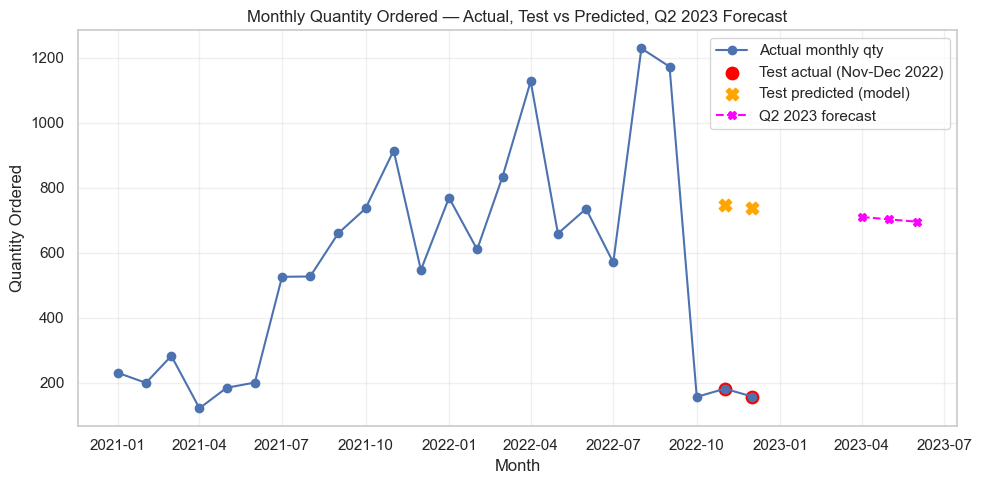

In [349]:
# So now plot historical 2021–2022 monthly series, test vs pred, and Q2 forecast
plt.figure(figsize=(10,5))

# Now we combine monthly_sales across available years for trend plot
ms_all = monthly_sales.copy()
# Create a datetime label for plotting: first day of month
ms_all['month_start'] = pd.to_datetime(ms_all['year'].astype(str) + '-' + ms_all['month'].astype(str) + '-01')

plt.plot(ms_all['month_start'], ms_all['qty_ordered'], marker='o', label='Actual monthly qty')

# And mark test months and predicted points for Nov & Dec 2022
test_dates = pd.to_datetime(test['year'].astype(str) + '-' + test['month'].astype(str) + '-01')
plt.scatter(test_dates, test['qty_ordered'], color='red', s=80, label='Test actual (Nov-Dec 2022)')

# Now plot test predictions
plt.scatter(test_dates, test_preds, color='orange', marker='X', s=80, label='Test predicted (model)')

# Plot Q2 2023 forecast as red Xs at approximate month positions
# create month_start datetimes for Apr/May/Jun 2023
q2_dates = pd.to_datetime(['2023-04-01','2023-05-01','2023-06-01'])
plt.plot(q2_dates, q2_preds, marker='X', linestyle='--', color='magenta', label='Q2 2023 forecast')

plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.title('Monthly Quantity Ordered — Actual, Test vs Predicted, Q2 2023 Forecast')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
